# Celltypist - Automatic assignment of cell types

In [14]:
# !pip install celltypist
import celltypist
celltypist.models.models_description()
# Mouse_Whole_Brain.pkl
# Developing_Mouse_Brain.pkl

,model,description
0,Immune_All_Low.pkl,immune sub-populations combined from 20 tissue...
1,Immune_All_High.pkl,immune populations combined from 20 tissues of...
2,Adult_COVID19_PBMC.pkl,peripheral blood mononuclear cell types from C...
3,Adult_CynomolgusMacaque_Hippocampus.pkl,cell types from the hippocampus of adult cynom...
4,Adult_Human_MTG.pkl,cell types and subtypes (10x-based) from the a...
5,Adult_Human_PancreaticIslet.pkl,cell types from pancreatic islets of healthy a...
6,Adult_Human_PrefrontalCortex.pkl,cell types and subtypes from the adult human d...
7,Adult_Human_Skin.pkl,cell types from human healthy adult skin
8,Adult_Human_Vascular.pkl,vascular populations combined from multiple ad...
9,Adult_Mouse_Gut.pkl,cell types in the adult mouse gut combined fro...


In [ ]:
!pip install gdown
import gdown

url = "https://drive.google.com/uc?id=1lRM-tR1MMbtgyKXLqRzV2YxokweiNUMz"
data_path = "adult_mouse_brain_ST4k.h5ad"
gdown.download(url, data_path, quiet=False)

In [31]:
# !pip install scanpy
import scanpy as sc
import numpy as np

# ----------------------------
# Load data
# ----------------------------
adata = sc.read_h5ad("adult_mouse_brain_ST4k.h5ad")

# ----------------------------
# Basic checks
# ----------------------------
print("n_obs, n_vars:", adata.shape)
print("Example genes:", adata.var_names[:5])

# CellTypist expects normalized + log1p data
# (skip if already done)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# ----------------------------
# Run CellTypist
# ----------------------------
model = "Mouse_Whole_Brain.pkl"
celltypist.models.download_models(
    model=model
)

pred = celltypist.annotate(
    adata,
    model=model,
    majority_voting=True
)
# predicted_labels - Raw CellTypist prediction
# over_clustering - An intermediate clustering CellTypist creates internally
#                   Usually a Leiden/Louvain-like graph clustering
#                   Used only to stabilize annotations
# majority_voting - Smoothed / denoised labels
#                   For each over_clustering group:
#                   CellTypist assigns the most frequent predicted_label
# ----------------------------
# Store results
# ----------------------------
adata.obs["celltypist"] = pred.predicted_labels['majority_voting']
# probability_matrix: cells/spots × cell types
probs = pred.probability_matrix

adata.obs["celltypist_confidence"] = probs.max(axis=1)

# ----------------------------
# Inspect label distribution
# ----------------------------
print(adata.obs["celltypist"].value_counts())


n_obs, n_vars: (4000, 20062)
Example genes: Index(['0610009B22Rik', '0610010K14Rik', '0610012G03Rik', '0610030E20Rik',
       '0610040B10Rik'],
      dtype='object', name='Symbol')
celltypist
319 Astro-TE NN              1995
332 SMC NN                   1358
318 Astro-NT NN               375
037 DG Glut                   168
009 L2/3 IT PIR-ENTl Glut      59
264 PRNc Otp Gly-Gaba          16
045 OB-STR-CTX Inh IMN         15
333 Endo NN                    14
Name: count, dtype: int64


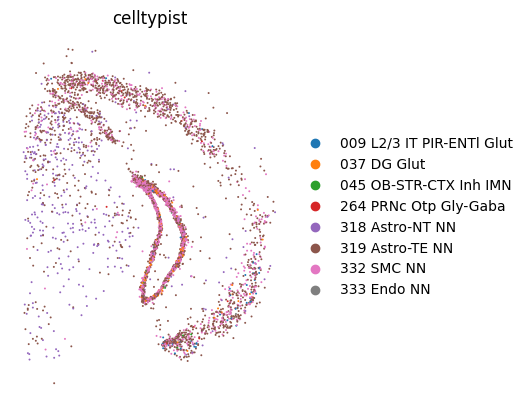

In [32]:
sc.pl.spatial(
    adata,
    color="celltypist",   # or any obs / gene
    size=1.2,
    frameon=False,
    spot_size=50
)
# Smooth muscle cells (SMCs) are a non-neuronal (NN)



In [33]:
pred

CellTypist prediction result for 4000 query cells
    predicted_labels: data frame with 3 columns ('predicted_labels', 'over_clustering', 'majority_voting')
    decision_matrix: data frame with 4000 query cells and 334 cell types
    probability_matrix: data frame with 4000 query cells and 334 cell types
    adata: AnnData object referred

# Manual cell type annotation - per cluster

In [39]:
import pandas as pd
sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset=False)
# Compute PCA first
sc.tl.pca(adata, n_comps=50)

# Compute nearest-neighbor graph
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50)

sc.tl.leiden(adata, resolution=1.5, key_added='leiden')


# marker_dict: your dictionary with gene lists
marker_dict = {
    "ACNT1": ["Aqp4","Gfap","Slc1a3","S100b","Aldh1l1","F3","Gja1","Glul","Sparcl1","Dbi"],
    "DGGRC2": ["Prox1","Calb1","Zbtb20","Neurod6","Ntng1","Rbfox3","Nrg1","Grin2a","Gria2","Dsp"],
    "TEGLU10": ["Slc17a7","Neurod2","Satb2","Tbr1","Camk2a","Nr4a2","Grin1","Gria1","Htr2a","Ntrk2"],
    "TEGLU17": ["Slc17a7","Camk2a","Ntf3","Gria1","Nr4a1","Nr4a2","Mafb","Npas4","Synpr","Ntrk3"]
}

# Step 1: Compute mean expression per cluster
cluster_means = adata.to_df().groupby(adata.obs['leiden']).mean()

# Step 2: Compute scores per cluster
cluster_scores = pd.DataFrame(index=cluster_means.index)

for ct, genes in marker_dict.items():
    genes_in_data = [g for g in genes if g in cluster_means.columns]
    cluster_scores[ct] = cluster_means[genes_in_data].mean(axis=1)

# Step 3: Assign cluster identity
cluster_scores["assigned_cell_type"] = cluster_scores.idxmax(axis=1)

# Step 4: Map back to all cells
adata.obs["cluster_assigned"] = adata.obs["leiden"].map(cluster_scores["assigned_cell_type"])


# Manual cell type annotation - per cell

Found 11 out of 11 
Found 11 out of 11 
Found 11 out of 11 
Found 11 out of 11 


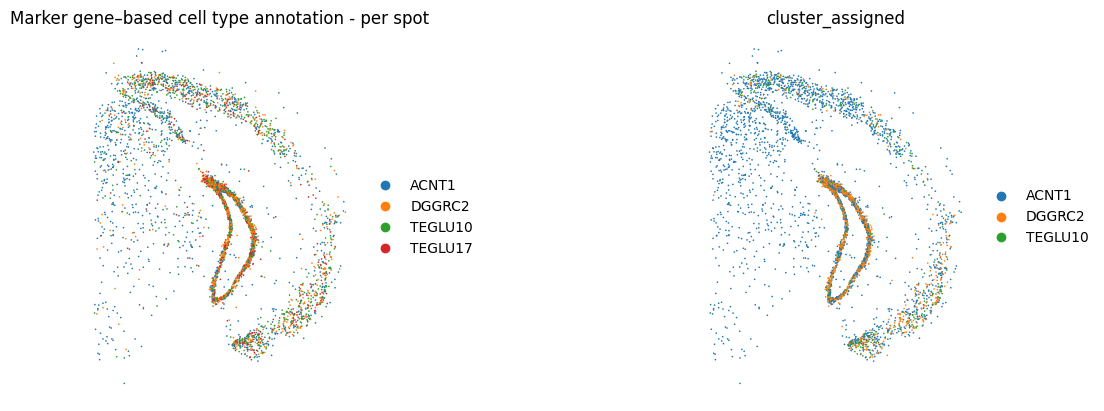

In [47]:
import scanpy as sc

# Your marker dictionary
marker_dict = {
    "ACNT1": [
        "Aqp4", "Gfap", "Slc1a3", "S100b",  # classic astrocyte
        "Aldh1l1", "F3", "Gja1", "Glul",
        "Sparcl1", "Dbi", "Mlc1"            # additional supportive glial markers
    ],

    "DGGRC2": [
        "Prox1", "Calb1", "Zbtb20", "Neurod6",  # dentate granule identity
        "Ntng1", "Rbfox3", "Nrg1", "Grin2a",    # neuronal markers present in DG
        "Gria2", "Dsp", "Lrrtm4"                 # region enriched / supportive markers
    ],

    "TEGLU10": [
        "Slc17a7", "Neurod2", "Satb2", "Tbr1",  # excitatory neuron core
        "Camk2a", "Nr4a2", "Grin1", "Gria1",
        "Htr2a", "Ntrk2", "Cux1"                 # cortical excitatory enriched
    ],

    "TEGLU17": [
        "Slc17a7", "Camk2a", "Ntf3", "Gria1",    # common excitatory set
        "Nr4a1", "Nr4a2", "Mafb", "Npas4",
        "Synpr", "Ntrk3", "Cux2"                 # subtype excitatory enrichment
    ]
}


# Normalize + log1p
# sc.pp.normalize_total(adata, target_sum=1e4)
# sc.pp.log1p(adata)

# Compute scores
for ct, genes in marker_dict.items():
    good_genes = [g for g in genes if g in adata.var_names]
    print(f"Found {len(good_genes)} out of {len(genes)} ")
    if len(good_genes) == 0:
        print(f"No marker genes found in adata for {ct}")
        continue
    sc.tl.score_genes(adata, gene_list=good_genes, score_name=f"{ct}_score")
    # For each cell i, compute the average expression of the genes in gene_list.
    # Subtract the average expression of a reference gene set
    #    (randomly selected genes of similar expression) → normalized score.

# Store the resulting score per cell/spot in adata.obs[score_name].

# Determine best label per spot
score_cols = [f"{ct}_score" for ct in marker_dict]
adata.obs["marker_assigned"] = (
    adata.obs[score_cols]
    .idxmax(axis=1)
    .str.replace("_score", "")
)

# Visualize
sc.pl.spatial(
    adata,
    color=["marker_assigned", "cluster_assigned"],
    frameon=False,
    title="Marker gene–based cell type annotation - per spot",
    spot_size=50
)


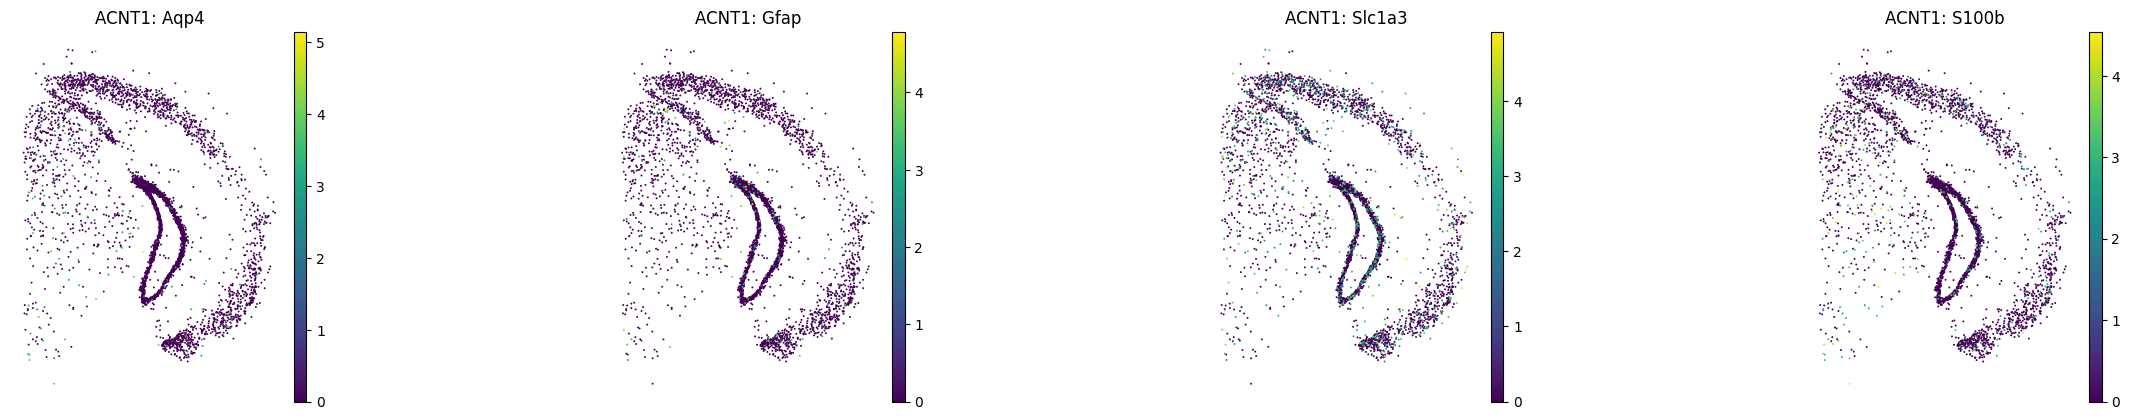

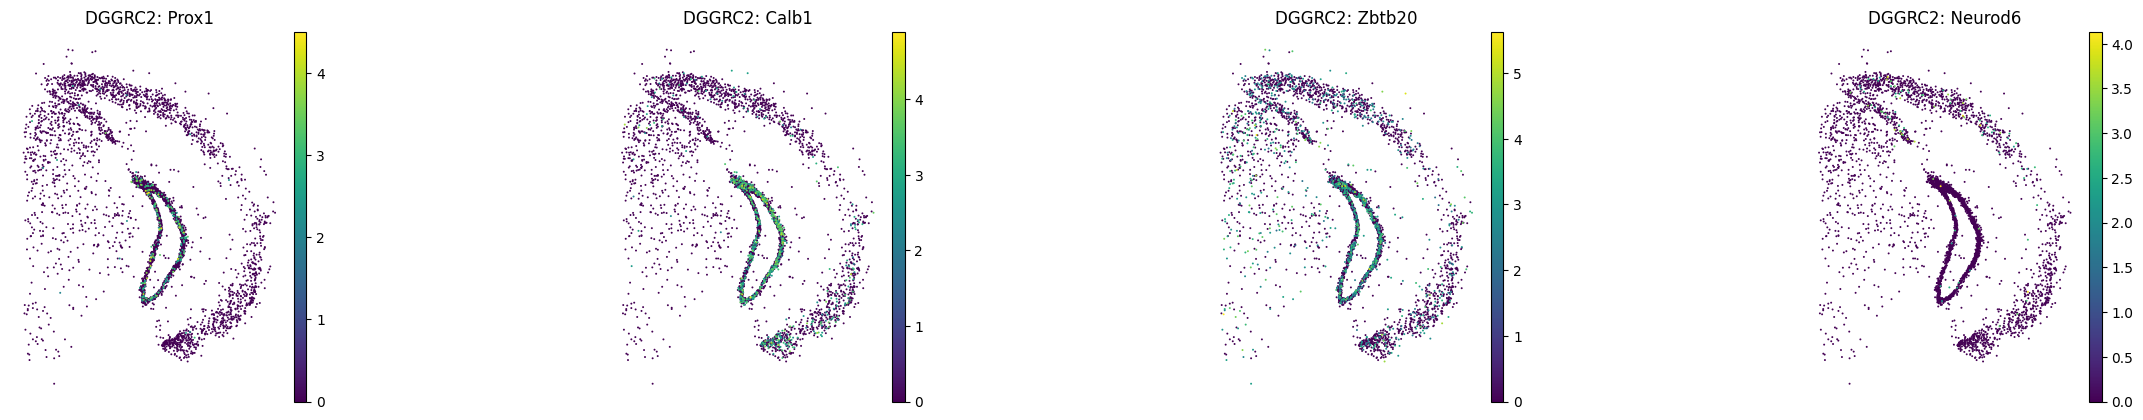

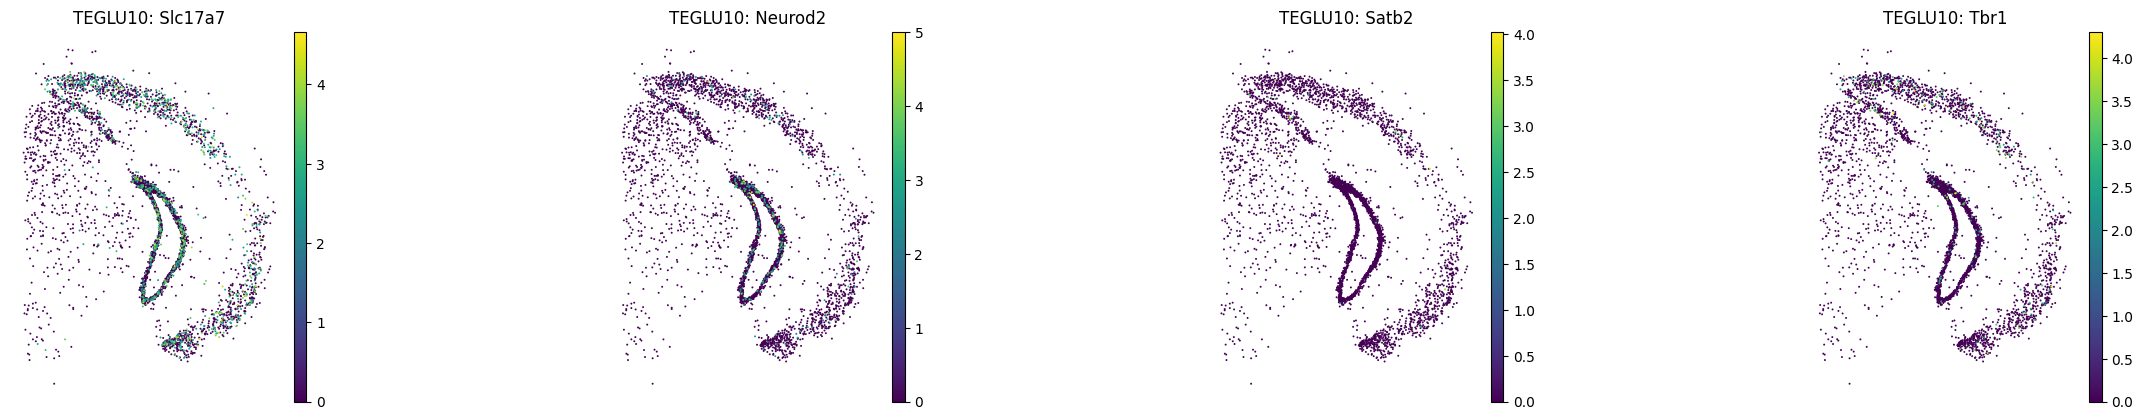

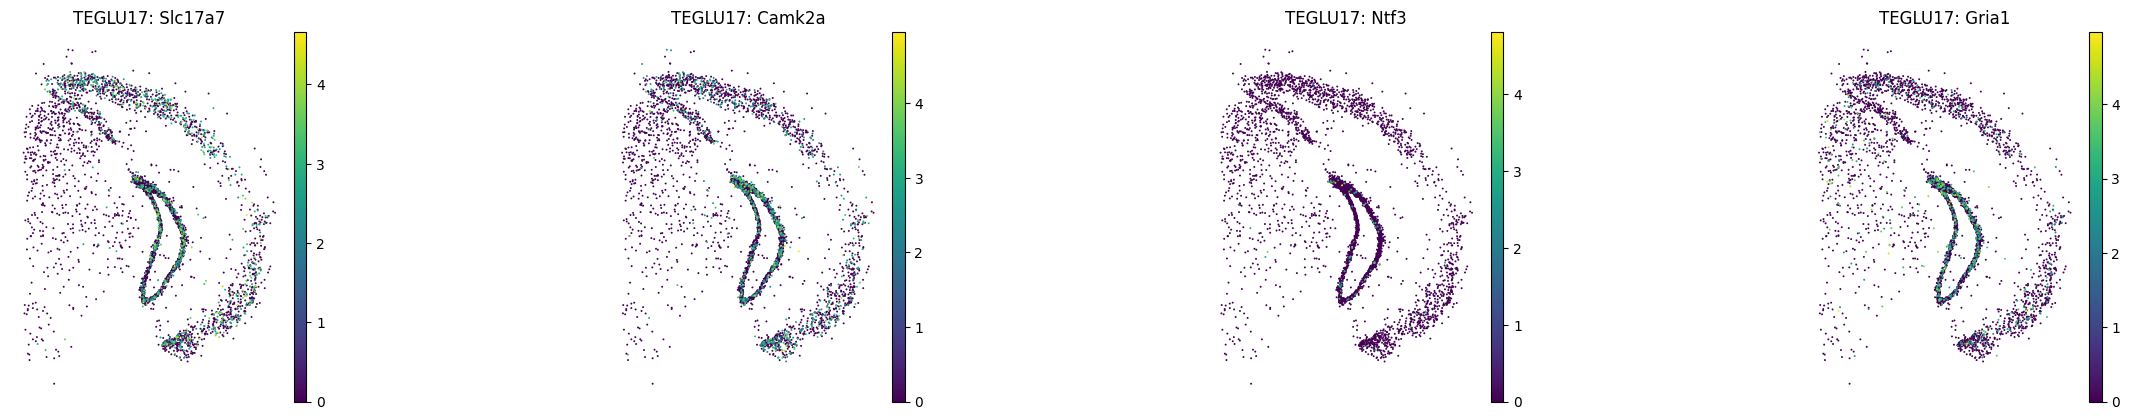

In [43]:
import matplotlib.pyplot as plt

# Define marker_dict (you already have it)
marker_dict = {
    "ACNT1": ["Aqp4","Gfap","Slc1a3","S100b","Aldh1l1","F3","Gja1","Glul","Sparcl1","Dbi","Mlc1"],
    "DGGRC2": ["Prox1","Calb1","Zbtb20","Neurod6","Ntng1","Rbfox3","Nrg1","Grin2a","Gria2","Dsp","Lrrtm4"],
    "TEGLU10": ["Slc17a7","Neurod2","Satb2","Tbr1","Camk2a","Nr4a2","Grin1","Gria1","Htr2a","Ntrk2","Cux1"],
    "TEGLU17": ["Slc17a7","Camk2a","Ntf3","Gria1","Nr4a1","Nr4a2","Mafb","Npas4","Synpr","Ntrk3","Cux2"]
}

# Loop over cell types
for cell_type, genes in marker_dict.items():
    genes_to_plot = genes[:4]  # first 5 genes

    # Filter genes present in the dataset
    genes_to_plot = [g for g in genes_to_plot if g in adata.var_names]

    if len(genes_to_plot) == 0:
        print(f"No markers found for {cell_type} in your data!")
        continue

    # Plot spatial expression
    sc.pl.spatial(
        adata,
        color=genes_to_plot,
        size=1.2,
        frameon=False,
        title=[f"{cell_type}: {g}" for g in genes_to_plot],
        spot_size=50
    )


In [44]:
adata

AnnData object with n_obs × n_vars = 4000 × 20062
    obs: 'n_genes_by_counts', 'celltypist', 'celltypist_confidence', 'leiden', 'cluster_assigned', 'ACNT1_score', 'DGGRC2_score', 'TEGLU10_score', 'TEGLU17_score', 'marker_assigned'
    var: 'Symbol', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'neighbors', 'over_clustering', 'celltypist_colors', 'hvg', 'pca', 'leiden', 'marker_assigned_colors', 'cluster_assigned_colors'
    obsm: 'spatial', 'X_pca'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'